In [51]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


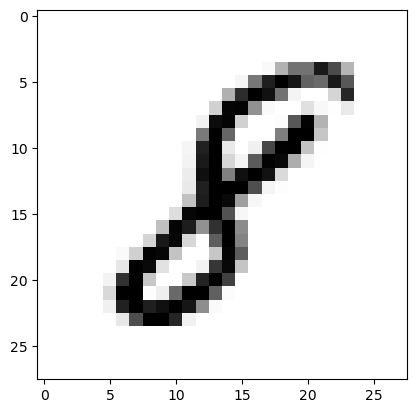

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [55]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2116 - accuracy: 0.9364
Epoch 2/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0900 - accuracy: 0.9724
Epoch 3/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0632 - accuracy: 0.9806
Epoch 4/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0490 - accuracy: 0.9843
Epoch 5/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0394 - accuracy: 0.9871
Epoch 6/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0326 - accuracy: 0.9892
Epoch 7/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0276 - accuracy: 0.9906
Epoch 8/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0236 - accuracy: 0.9916
Epoch 9/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0210 - accuracy: 0.9931
Epoch 10/100
1875/1875 [==============================] - 14s 8m

In [57]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1849 - accuracy: 0.9855


[0.18494871258735657, 0.9854999780654907]

1/1 [==============================] - 0s 45ms/step
7


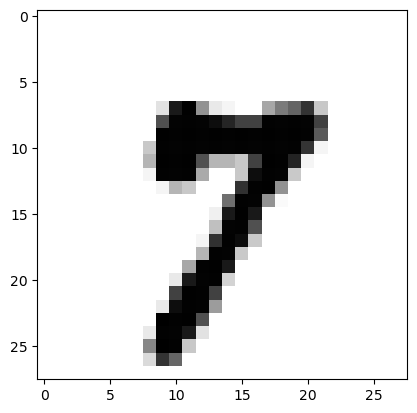

In [58]:

image_index = 4467
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [59]:
model.save('cnn_model.h5')